# Decision Tree and Random Forest Model (Binary Classification)
---
## Aim
* This code focuses on implementing a decision tree/ random forest model to predict the class of simulated particle decays
* This is different from the previous models as it focuses on binary classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%config InlineBackend.figure_formats = ['svg']

Everything except `acceptance.pkl` and `total_dataset.pkl` are relevant to this exercise.

In [3]:
simulations = ['jpsi_mu_k_swap','psi2S','jpsi_mu_pi_swap', 'phimumu', 'pKmumu_piTop','signal','pKmumu_piTok_kTop','k_pi_swap','jpsi']

# 1. Data Pre-processing

The data here has been preprocessed to combine all the dataframes into one big dataframe with an additional column, specifying the class.

In [4]:
df = pd.DataFrame()

for file in simulations:
    temp_df = pd.read_pickle('data/' + file + '.pkl')
    if file == 'signal': 
        temp_df["class"] = 'signal'
    else:
        temp_df["class"] = 'other'
    df = df.append(temp_df, ignore_index=True)

df.head()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,q2,phi,costhetal,costhetak,polarity,year,class
0,0.973928,0.003321,0.003178,1.569017e-06,0.029936,14543.49,1184.283004,3.199491,2.846102,14543.873799,...,-39.1316,9.512142,511,7.725413,2.170310,-0.984568,-0.350740,1,2016,other
1,0.615791,0.045364,0.213335,8.799382e-08,0.002344,25857.66,1817.817081,3.346880,-1.191892,25857.875867,...,57.3986,7.159271,-511,12.714047,-1.152073,-0.925117,0.384775,1,2016,other
2,0.978006,0.002302,0.004772,1.491569e-06,0.003949,14040.03,1082.531306,3.254268,2.481684,14040.427561,...,-12.3357,6.010502,511,8.816600,2.810081,-0.988628,-0.234586,1,2016,other
3,0.975666,0.012426,0.019173,1.230290e-04,0.636164,8185.07,1635.375513,2.293454,1.800428,8185.751926,...,86.6346,6.876421,-511,9.897957,-2.225030,-0.960749,-0.131841,1,2016,other
4,0.979261,0.022059,0.012731,5.174431e-06,0.488873,8903.09,1414.075757,2.526702,1.014898,8903.716934,...,33.1838,11.316829,511,12.692251,-0.991083,-0.990580,0.500036,1,2016,other


In [8]:
df.describe()

,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,mu_plus_PE,...,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,q2,phi,costhetal,costhetak,polarity
count,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,...,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06,1.430536e+06
mean,1.543841e-02,9.973894e-02,9.727155e-01,1.819605e-04,5.120067e-03,4.577415e+04,3.533013e+03,3.105180e+00,6.227533e-03,4.577438e+04,...,8.396711e-01,-1.798027e-01,-2.935651e+00,1.637727e+01,1.046622e+00,1.009600e+01,1.562265e-02,1.485039e-02,-1.738418e-01,6.477292e-01
std,6.402191e-02,1.439933e-01,8.190330e-02,5.362566e-03,3.417842e-02,4.433915e+04,2.609625e+03,6.291147e-01,1.807641e+00,4.433903e+04,...,3.243812e-02,3.231536e-02,4.076783e+01,1.781503e+01,5.109991e+02,3.285039e+00,1.802295e+00,5.477385e-01,5.750694e-01,7.618709e-01
min,1.328284e-06,9.338385e-08,1.442755e-05,2.212421e-13,5.037283e-10,3.001500e+03,1.000001e+03,1.595518e+00,-3.141591e+00,3.003359e+03,...,5.411000e-01,-3.793000e-01,-1.809695e+02,5.950991e-01,-5.110000e+02,4.496660e-02,-3.141593e+00,-9.999918e-01,-9.999986e-01,-1.000000e+00
25%,9.510988e-05,1.371967e-02,9.824122e-01,9.252994e-07,1.191120e-06,1.815260e+04,1.853904e+03,2.619548e+00,-1.552733e+00,1.815290e+04,...,8.180000e-01,-2.014000e-01,-3.034943e+01,5.975293e+00,-5.110000e+02,9.518330e+00,-1.522296e+00,-4.358477e-01,-6.816766e-01,1.000000e+00
50%,4.933332e-04,4.159524e-02,9.949145e-01,2.550377e-06,1.361527e-05,3.235918e+04,2.781446e+03,3.070735e+00,1.769432e-02,3.235936e+04,...,8.397000e-01,-1.798000e-01,-2.986300e+00,1.083816e+01,5.110000e+02,9.620855e+00,-2.394114e-03,1.943034e-02,-2.666912e-01,1.000000e+00
75%,5.341427e-03,1.177767e-01,9.985228e-01,7.403882e-06,6.218406e-04,5.746017e+04,4.328204e+03,3.555219e+00,1.567700e+00,5.746026e+04,...,8.614000e-01,-1.582000e-01,2.446385e+01,2.002281e+01,5.110000e+02,1.204746e+01,1.585419e+00,4.702883e-01,3.000649e-01,1.000000e+00
max,9.991404e-01,9.954261e-01,9.999995e-01,9.993312e-01,9.908569e-01,1.696015e+06,7.441134e+04,5.112117e+00,3.141572e+00,1.696015e+06,...,1.034100e+00,5.900000e-03,1.740547e+02,5.034017e+02,5.110000e+02,2.052086e+01,3.141592e+00,9.999996e-01,9.999988e-01,1.000000e+00


# 2. Model Training
Here a Machine Learning model is trained with features in `cols_to_use`, which excludes meaningless columns such as `year`.

Also, we shouldn't cut based on the models we are trying to fit on, namely `phi`, `'costhetal'` and `'costhetak'`.

In [9]:
cols_to_use = ['mu_plus_MC15TuneV1_ProbNNk', 'mu_plus_MC15TuneV1_ProbNNpi',
       'mu_plus_MC15TuneV1_ProbNNmu', 'mu_plus_MC15TuneV1_ProbNNe',
       'mu_plus_MC15TuneV1_ProbNNp', 'mu_plus_P', 'mu_plus_PT', 'mu_plus_ETA',
       'mu_plus_PHI', 'mu_plus_PE', 'mu_plus_PX', 'mu_plus_PY', 'mu_plus_PZ',
       'mu_plus_IPCHI2_OWNPV', 'mu_minus_MC15TuneV1_ProbNNk',
       'mu_minus_MC15TuneV1_ProbNNpi', 'mu_minus_MC15TuneV1_ProbNNmu',
       'mu_minus_MC15TuneV1_ProbNNe', 'mu_minus_MC15TuneV1_ProbNNp',
       'mu_minus_P', 'mu_minus_PT', 'mu_minus_ETA', 'mu_minus_PHI',
       'mu_minus_PE', 'mu_minus_PX', 'mu_minus_PY', 'mu_minus_PZ',
       'mu_minus_IPCHI2_OWNPV', 'K_MC15TuneV1_ProbNNk',
       'K_MC15TuneV1_ProbNNpi', 'K_MC15TuneV1_ProbNNmu',
       'K_MC15TuneV1_ProbNNe', 'K_MC15TuneV1_ProbNNp', 'K_P', 'K_PT', 'K_ETA',
       'K_PHI', 'K_PE', 'K_PX', 'K_PY', 'K_PZ', 'K_IPCHI2_OWNPV',
       'Pi_MC15TuneV1_ProbNNk', 'Pi_MC15TuneV1_ProbNNpi',
       'Pi_MC15TuneV1_ProbNNmu', 'Pi_MC15TuneV1_ProbNNe',
       'Pi_MC15TuneV1_ProbNNp', 'Pi_P', 'Pi_PT', 'Pi_ETA', 'Pi_PHI', 'Pi_PE',
       'Pi_PX', 'Pi_PY', 'Pi_PZ', 'Pi_IPCHI2_OWNPV', 'B0_MM',
       'B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF', 'B0_FDCHI2_OWNPV', 'Kstar_MM',
       'Kstar_ENDVERTEX_CHI2', 'Kstar_ENDVERTEX_NDOF', 'Kstar_FDCHI2_OWNPV',
       'J_psi_MM', 'J_psi_ENDVERTEX_CHI2', 'J_psi_ENDVERTEX_NDOF',
       'J_psi_FDCHI2_OWNPV', 'B0_IPCHI2_OWNPV', 'B0_DIRA_OWNPV', 'B0_OWNPV_X',
       'B0_OWNPV_Y', 'B0_OWNPV_Z', 'B0_FD_OWNPV', 'B0_ID', 'q2', 'polarity']

The model was split into a training set and testing set to ensure validity of evaluation metrics. The splitting was stratified because of low event numbers in some datasets.

In [10]:
from sklearn.model_selection import train_test_split

# Feature dataset
X = df[cols_to_use]
# Labels/ class dataset
y = df.iloc[:, -1]

# Test train split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=20, stratify = y)

## Define models

The following part defines the Machine Learning models used.

Note: `n_jobs` refers to the number of computer cores used for the computation to speed up training time.

In [12]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(verbose=1, n_jobs = 4)

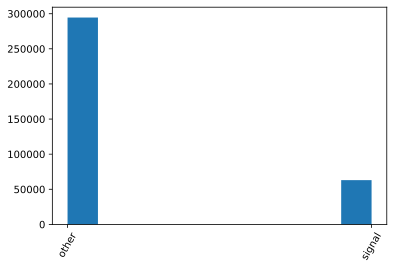

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth = 20)
tree.fit(X_train, y_train)
pickle.dump(tree, open('saved_models/tree_bin.pkl', 'wb'))
y_valid_pred_tree = tree.predict(X_valid)

plt.hist(y_valid_pred_tree)
plt.xticks(rotation=60)
plt.show()

## Prediction

In [12]:
y_valid_pred = tree.predict(X_valid)

# 3. Results
A confusion matrix has been plot to see which events were most mis-classified.

## Tree

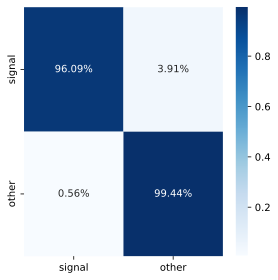

In [20]:
from sklearn.metrics import confusion_matrix 
cm_tree = confusion_matrix(y_valid, y_valid_pred, labels = ['signal', 'other'])
#cm2.sum(axis=1, keepdims=True)

plt.figure(figsize=(4,4))
sns.heatmap(cm_tree/cm_tree.sum(keepdims=True, axis=1), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=['signal', 'other'], yticklabels=['signal', 'other'])

plt.tight_layout()

In [18]:
y_valid_pred_tree

array(['signal', 'k_pi_swap', 'psi2S', ..., 'signal', 'jpsi', 'signal'],
      dtype=object)

# 4. Load Model and act on total_dataset

This part uses the saved model to act on the total_dataset and filters it to create a dataframe of 'wanted' events.

We have to be careful as
* There might be other combinitorial background in the total_dataset which was not taken account of
* Other physical effects might be at play

But it would be useful for the fitting group to try their methods on this semi-filtered dataset now.

In [41]:
total = pd.read_pickle('data/total_dataset.pkl')

def gen_predictions(df, cols_to_use, model):
    X = df[cols_to_use]
    y_predict = model.predict(X)
    df['predictions'] = y_predict
    
    filtered = df[df['predictions'] == 'signal']
    
    print('Percentage of data kept:', len(filtered)/len(df) *100)
    return filtered

Filter data on the total dataset

In [23]:
filtered = gen_predictions(total, cols_to_use, tree)

Percentage of data kept: 6.207789340585455


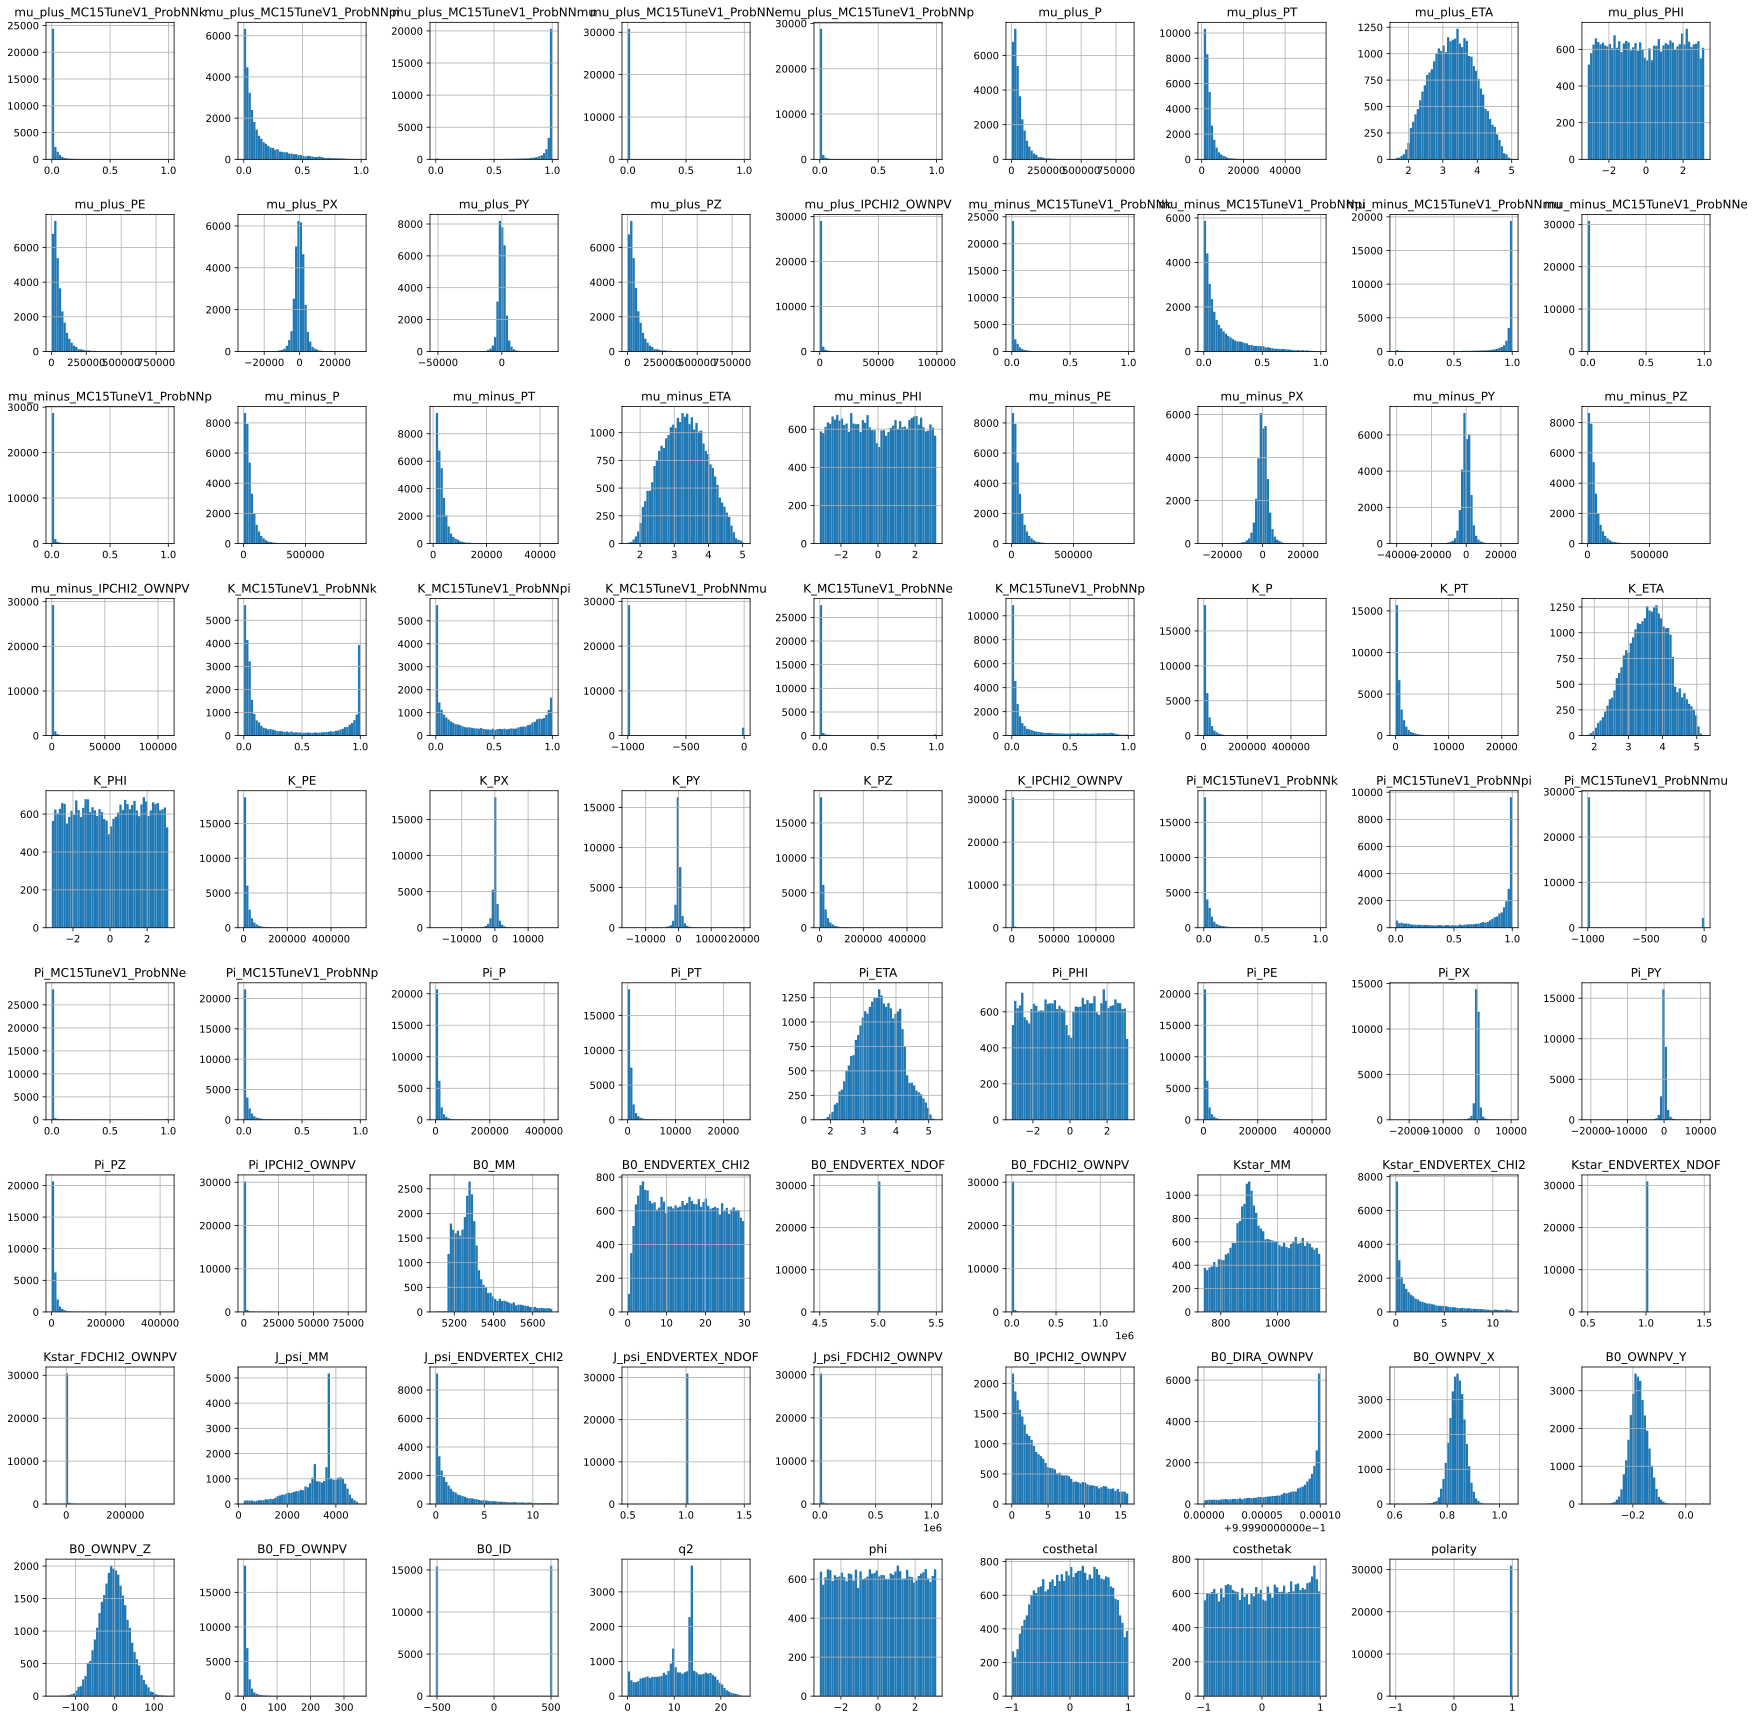

In [25]:
plt.rcParams["figure.figsize"] = (24,24)
plt.rc("figure", dpi=300)
filtered.hist(bins=50)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'False Positive Rate')

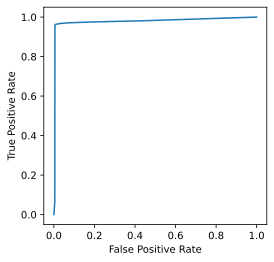

In [42]:
y_score = tree.predict_proba(X_valid)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, t = roc_curve(y_true=y_valid, y_score = y_score, pos_label ='signal')

plt.figure(figsize=(4,4))
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 5. Feature Importance

This asses which features the model thought were the most important in determining what events occurred.

## Node frequency

In [26]:
scores, names = zip(*sorted(zip(tree.feature_importances_, cols_to_use), reverse=True))
names

('q2',
 'Pi_MC15TuneV1_ProbNNk',
 'polarity',
 'K_MC15TuneV1_ProbNNk',
 'B0_MM',
 'Pi_MC15TuneV1_ProbNNpi',
 'J_psi_MM',
 'Pi_MC15TuneV1_ProbNNmu',
 'Kstar_MM',
 'mu_minus_MC15TuneV1_ProbNNmu',
 'B0_ENDVERTEX_CHI2',
 'mu_plus_MC15TuneV1_ProbNNmu',
 'K_MC15TuneV1_ProbNNp',
 'K_PT',
 'K_MC15TuneV1_ProbNNmu',
 'Pi_PT',
 'K_MC15TuneV1_ProbNNpi',
 'Pi_MC15TuneV1_ProbNNp',
 'mu_plus_MC15TuneV1_ProbNNk',
 'mu_minus_MC15TuneV1_ProbNNpi',
 'mu_minus_MC15TuneV1_ProbNNk',
 'Pi_IPCHI2_OWNPV',
 'mu_plus_MC15TuneV1_ProbNNpi',
 'Pi_P',
 'B0_OWNPV_Z',
 'mu_plus_PHI',
 'J_psi_ENDVERTEX_CHI2',
 'Pi_ETA',
 'B0_OWNPV_X',
 'mu_minus_PHI',
 'B0_IPCHI2_OWNPV',
 'mu_plus_PY',
 'Pi_PE',
 'mu_minus_PX',
 'Kstar_ENDVERTEX_CHI2',
 'Pi_PX',
 'mu_plus_ETA',
 'Pi_PY',
 'B0_OWNPV_Y',
 'mu_plus_IPCHI2_OWNPV',
 'K_ETA',
 'mu_minus_PT',
 'Kstar_FDCHI2_OWNPV',
 'Pi_PHI',
 'K_PX',
 'mu_minus_PY',
 'J_psi_FDCHI2_OWNPV',
 'K_P',
 'B0_FDCHI2_OWNPV',
 'mu_minus_IPCHI2_OWNPV',
 'mu_plus_PT',
 'K_IPCHI2_OWNPV',
 'mu_plus_PX',
 

## Visualising the tree

## Decision Tree Model

This part shows the frequency of predictions

The Decision Tree keeps many of the features 

This part was inspired by https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c 

from sklearn.tree import plot_tree
plot_tree(tree)

In [ ]:
estimator = loaded.estimators_[1]

export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = cols_to_use,
                class_names = simulations,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [3]:
import graphviz

In [4]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot'

# 6. Act on acceptance function

In [12]:
acc = pd.read_pickle('data/acceptance_mc.pkl')
acc_filtered = gen_predictions(acc, cols_to_use, loaded)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.4s finished


Percentage of data kept: 95.88091939977039


In [13]:
pickle.dump(acc_filtered, open('outputs/filt_frst_acc_802.pkl', 'wb'))